In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca

from sklearn.preprocessing import robust_scale, scale
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine


In [2]:
df = pd.read_csv("data/boston_housing.csv")
df.drop(columns=['zn', 'chas'], inplace=True)
df

,crim,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,2.31,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,7.07,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,7.07,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,2.18,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,2.18,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,11.93,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,11.93,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,11.93,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,11.93,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [116]:
X0 = df.values[:,:-1]
X0 = X0.astype('d')
X0 = robust_scale(X0)
N = len(X0)
n = X0.shape[1]
print(X0.shape)

(506, 11)


In [117]:
pca_sk = PCA()
U0 = pca_sk.fit_transform(X0)

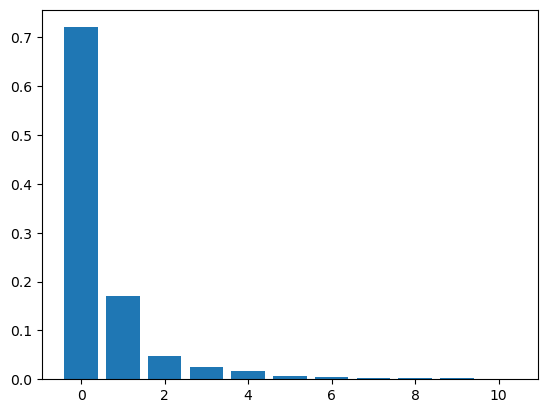

In [118]:
plt.bar(range(n), pca_sk.explained_variance_ratio_)
plt.show()

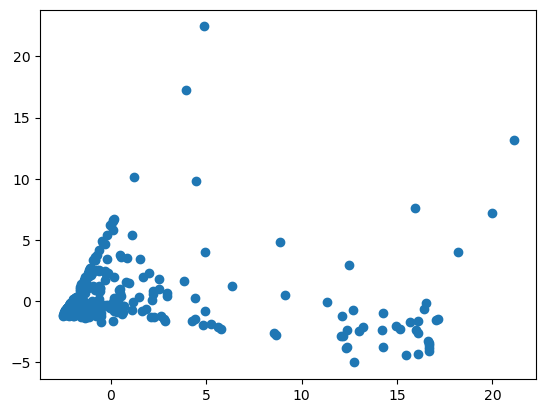

In [119]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

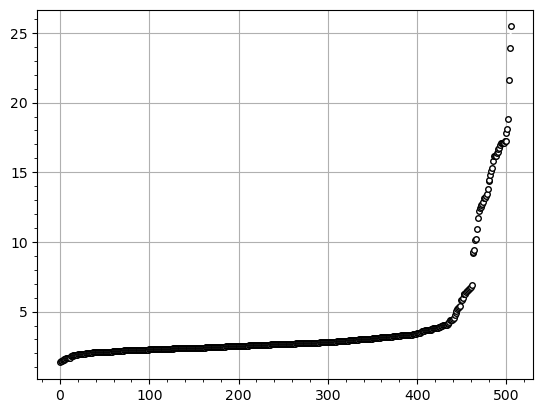

[ 0.93379097  0.11206651  0.09540034  0.10316313 -0.1819592   0.1902672
  0.22747036  0.20216319 -0.21230943 -1.66763249  0.1292417 ]


In [120]:
c0 = pca.location(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c0), bins=40, rwidth=0.9)
plt.grid(1)
plt.minorticks_on()
plt.show()
print(c0)

[-0.0112141  -0.17906038 -0.20837065  0.17235817 -0.07962301  0.7851259
 -0.00692514 -0.05375369 -0.82451659  0.02094184  0.36139812]


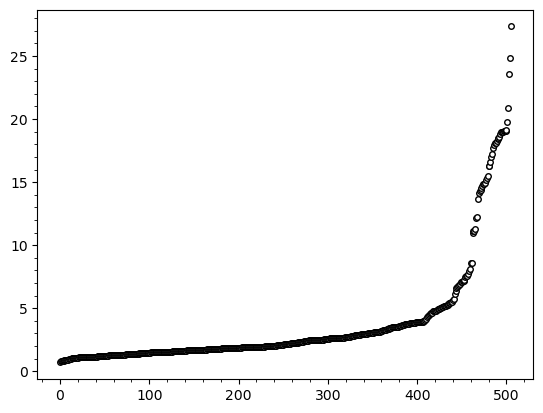

In [328]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.5, 0.001))
c = pca.robust_location(X0, wma)
print(c)
plt.plot(sorted(pca.distance_center(X0, c)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X0, c), bins=30, rwidth=0.9)
plt.minorticks_on()
plt.show()

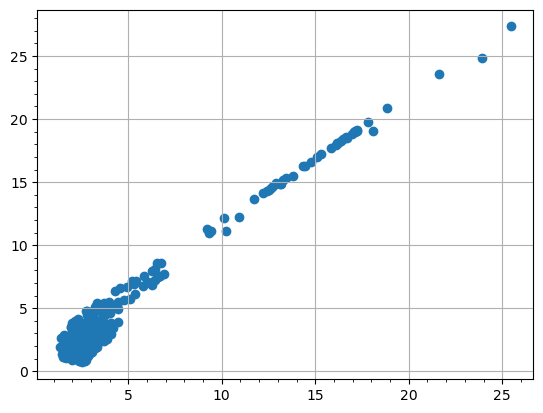

In [329]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [330]:
X1_0 = X0 - c0
X1 = X0 - c

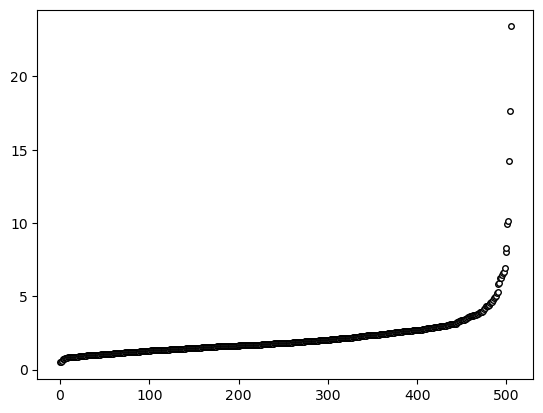

20.714205183396604 [-0.27337028 -0.04952622 -0.06500729  0.03665809 -0.04243917  0.05347527
 -0.05065743 -0.05015018 -0.03878864  0.94935589 -0.06872422]


In [331]:
a1_0, L1_0 = pca.find_pc(X1_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1_0, a1_0), bins=30, rwidth=0.9)
plt.show()
print(L1_0, a1_0)

2.1420391969825148 [-0.02959124 -0.23531962 -0.27552783  0.38209295 -0.33782586  0.45844153
 -0.00167016 -0.07468677 -0.33765446  0.00390347 -0.52719712]


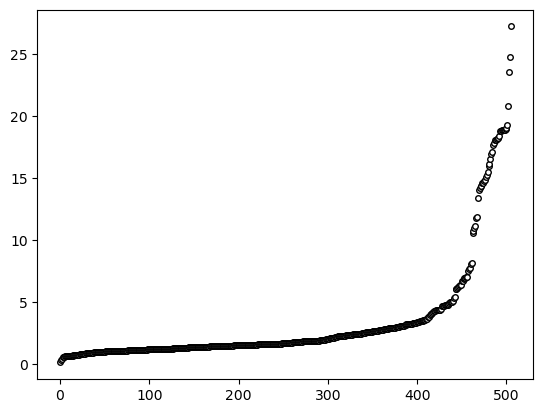

In [345]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.5, 0.001))
a1, L1 = pca.find_robust_pc(X1, wma)
print(L1, a1)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_center(X1, a1), bins=30, rwidth=0.9)
plt.show()
U1 = pca.project_line(X1_0, a1)
U1_0 = pca.project_line(X1, a1_0)

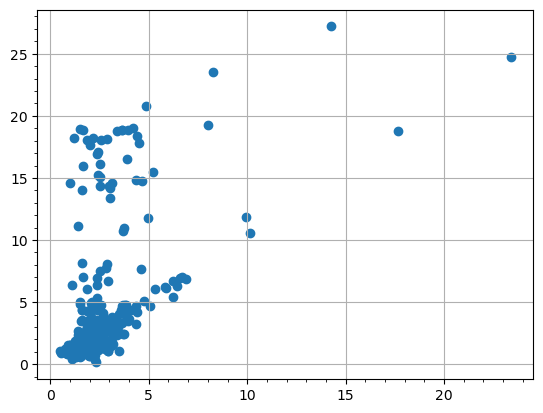

In [346]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [347]:
X2_0 = pca.project(X1_0, a1_0)
X2 = pca.project(X1, a1)

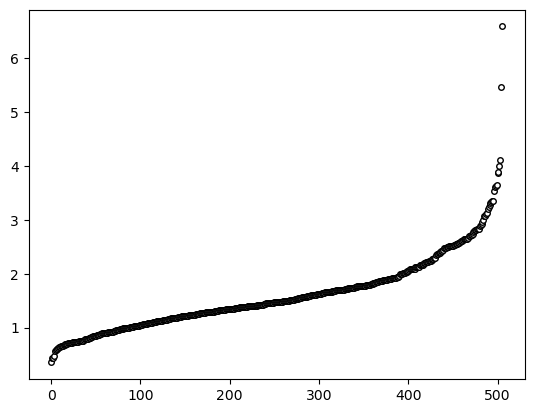

4.9244399817676126 [ 0.90521618  0.08029356  0.0983207  -0.10972148  0.08194573 -0.10185945
  0.09280549  0.08736199  0.09842986  0.30760932  0.12158737]


In [348]:
a2_0, L2_0 = pca.find_pc(X2_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2_0, a2_0), bins=30, rwidth=0.9)
plt.show()
print(L2_0, a2_0)

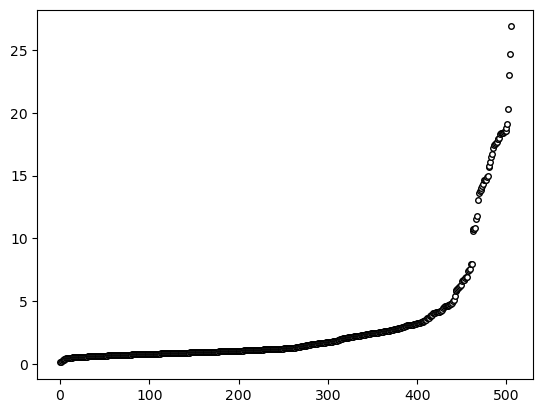

1.1470740858049813 [-0.02132734 -0.11304181  0.02203142 -0.09447808  0.4056056   0.26341278
  0.04803216  0.06774193 -0.73710649  0.17222752  0.40443622]


In [349]:
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.5, 0.001))
a2, L2 = pca.find_robust_pc(X2, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X2, a2), bins=30, rwidth=0.9)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

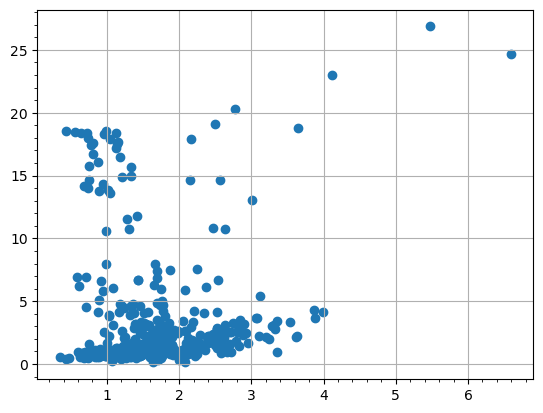

In [350]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [351]:
X3_0 = pca.project(X2_0, a2_0)
X3 = pca.project(X2, a2)

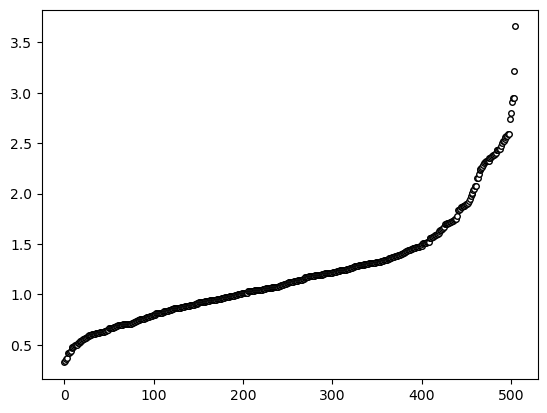

1.353881555098507 [-0.30323521  0.27034876  0.3005298  -0.58331873  0.26366546 -0.28983029
  0.08478467  0.12913632  0.27827406  0.04849103  0.38367633]


In [352]:
a3_0, L3_0 = pca.find_pc(X3_0)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3_0, a3_0)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3_0, a3_0), bins=30, rwidth=0.9)
plt.show()
print(L3_0, a3_0)

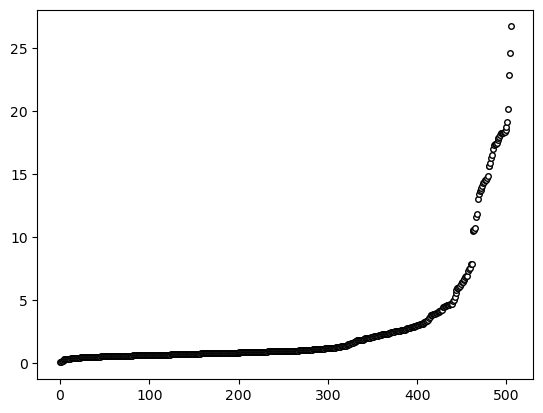

5.673816048082953 [ 3.63588581e-02  1.65521982e-02  3.42965407e-01  7.11177873e-01
  2.11823732e-01 -5.09693723e-01  6.00519404e-04 -1.09184270e-02
 -2.28317540e-01 -8.40588653e-02 -1.05040330e-01]


In [353]:
# alpha = (N - 20) / N
# print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(0.5, 0.001))
a3, L3 = pca.find_robust_pc(X3, wma)
# plt.figure(figsize=(10,8))
plt.plot(sorted(pca.distance_line(X3, a3)), marker='o', markersize=4, mfc='w', mec='k', c='w')
# plt.hist(pca.distance_line(X3, a3), bins=30, rwidth=0.9)
plt.show()
print(L3, a3)
U3 = pca.project_line(X3, a3)
U3_0 = pca.project_line(X3_0, a3_0)

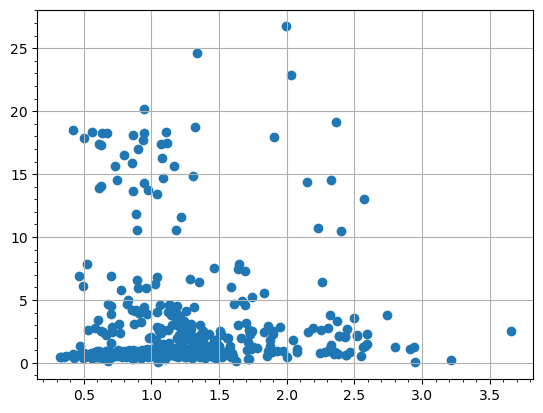

In [354]:
plt.scatter(pca.distance_line(X3_0, a3_0), pca.distance_line(X3, a3))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [355]:
from sklearn.decomposition import PCA

In [356]:
def positive(U):
    if max(U[U>0]) < max(abs(U[U<0])):
        U = -U
    return U

U1 = positive(U1)
U2 = positive(U2)
U3 = positive(U3)
U1_0 = positive(U1_0)
U2_0 = positive(U2_0)
U3_0 = positive(U3_0)


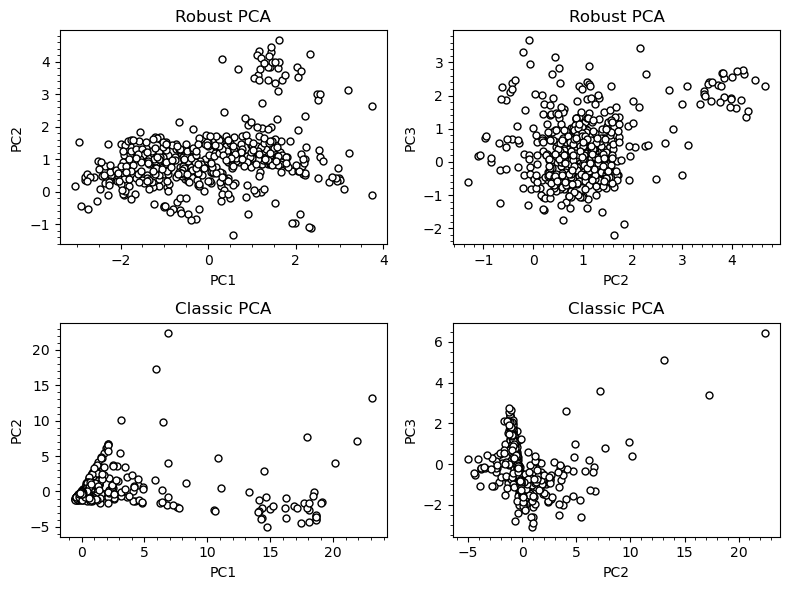

In [357]:
plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.title('Robust PCA')
plt.scatter(U1, U2, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,2)
plt.title('Robust PCA')
plt.scatter(U2, U3, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,3)
plt.title('Classic PCA')
plt.scatter(U1_0, U2_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
# plt.grid()
plt.minorticks_on()
plt.subplot(2,2,4)
plt.title('Classic PCA')
plt.scatter(U2_0, U3_0, s=25, c='w', edgecolors='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
# plt.grid()
plt.minorticks_on()
plt.tight_layout()
plt.savefig('fig/robust_pca_cigarette.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


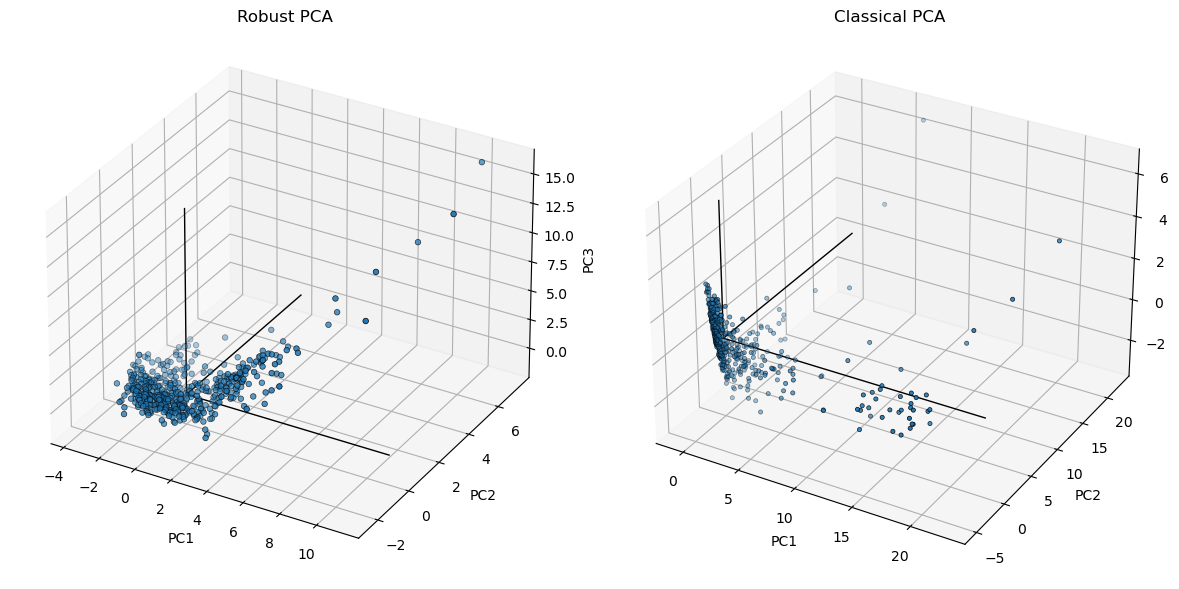

In [302]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"})
fig.set_size_inches(14, 6)
ax1, ax2 = axes
ax1.set_proj_type('persp', 2)
ax1.scatter(U1, U2, U3, s=16, edgecolors='k', linewidth=0.5)

ax1.plot([0, U1.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, U2.max()], [0, 0], color='k', linewidth=1.0)
ax1.plot([0, 0], [0, 0], [0, U3.max()], color='k', linewidth=1.0)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3', rotation='vertical')

ax1.set_title('Robust PCA')

ax2.scatter(U1_0, U2_0, U3_0, s=9, edgecolors='k', linewidth=0.5)

ax2.plot([0, U1_0.max()], [0, 0], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, U2_0.max()], [0, 0], color='k', linewidth=1.0)
ax2.plot([0, 0], [0, 0], [0, U3_0.max()], color='k', linewidth=1.0)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3', rotation='vertical')

ax2.set_title('Classical PCA')

fig.set_tight_layout(True)

plt.savefig('fig/robust_pca_boston_1.eps')

plt.show()

In [303]:
As_0, Ls_0, Us_0 = pca.find_pc_all(X1_0)

In [304]:
# N = len(X1)
# alpha = (N - 25) / N
print(alpha)
wma = af.averaging_function("WM", rhofunc=func.Quantile_Sqrt(alpha, 0.001))
As, Ls, Us = pca.find_robust_pc_all(X1, wma)

0.7


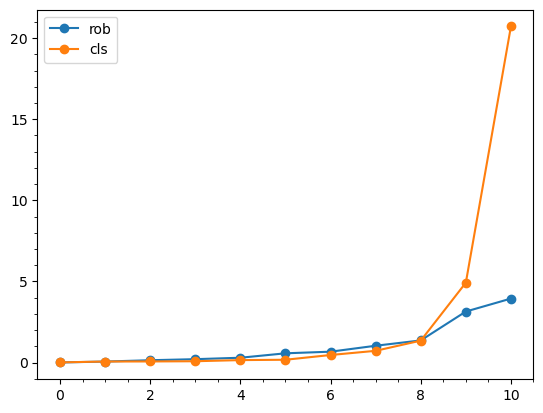

In [305]:
plt.plot(sorted(Ls), marker='o', label='rob')
plt.plot(sorted(Ls_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [306]:
Vs = np.array([np.var(U) for U in Us])
Vs_0 = np.array([np.var(U) for U in Us_0])
Vs /= Vs.sum()
Vs_0 /= Vs_0.sum()

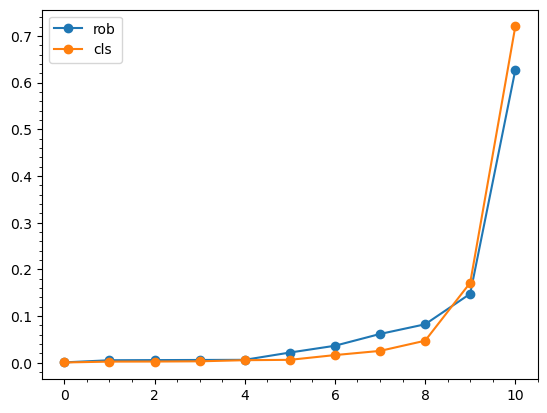

In [307]:
plt.plot(sorted(Vs), marker='o', label='rob')
plt.plot(sorted(Vs_0), marker='o', label='cls')
plt.legend()
plt.minorticks_on()
plt.show()

In [308]:
from mlgrad.pca.location_scatter import robust_scatter_matrix

In [309]:
S = robust_scatter_matrix(X1, wma)
# print(S)

[[ 5.79240431e-01  2.10314451e-02 -8.73092681e-02 -2.90391141e-02
   3.67365038e-03  7.08072327e-02 -9.62669316e-01 -1.28139466e-01
  -3.75642579e-02  2.25617486e-02 -1.20700334e-01]
 [ 2.10314451e-02  3.74214523e+00 -1.02034507e+00  7.81126575e-02
   7.82178529e-02  5.00969800e-01  1.20922636e+00 -2.63638649e+00
  -2.28358752e-01  1.27483392e-02 -4.96237599e-02]
 [-8.73092681e-02 -1.02034507e+00  4.46259526e+00  1.56271488e-01
  -1.15388410e+00  1.02060260e+00 -1.23812675e+00 -7.86435697e-01
  -3.81532314e-01  1.20282586e-02  3.98449122e-01]
 [-2.90391141e-02  7.81126575e-02  1.56271488e-01  7.13568864e-01
  -4.71074416e-01  6.47927770e-02 -4.32916846e-01  1.28660572e-01
   1.59985947e-01  1.90065187e-02  1.00640181e+00]
 [ 3.67365038e-03  7.82178529e-02 -1.15388410e+00 -4.71074416e-01
   2.28761807e+00  7.66927814e-01  1.08743142e+00  4.51502347e-02
  -2.21418960e-01  1.20137030e-02 -1.11462627e+00]
 [ 7.08072327e-02  5.00969800e-01  1.02060260e+00  6.47927770e-02
   7.66927814e-01  

In [310]:
L, A = np.linalg.eig(S)
# print(A)
print(L/L.sum())

[0.48584066 0.1828393  0.12158402 0.07317752 0.05358493 0.03238136
 0.00053551 0.00506472 0.01029889 0.01300004 0.02169305]
